In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [3]:
ad = pd.read_csv("Company_data.csv")
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
ad.shape

(200, 4)

In [8]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


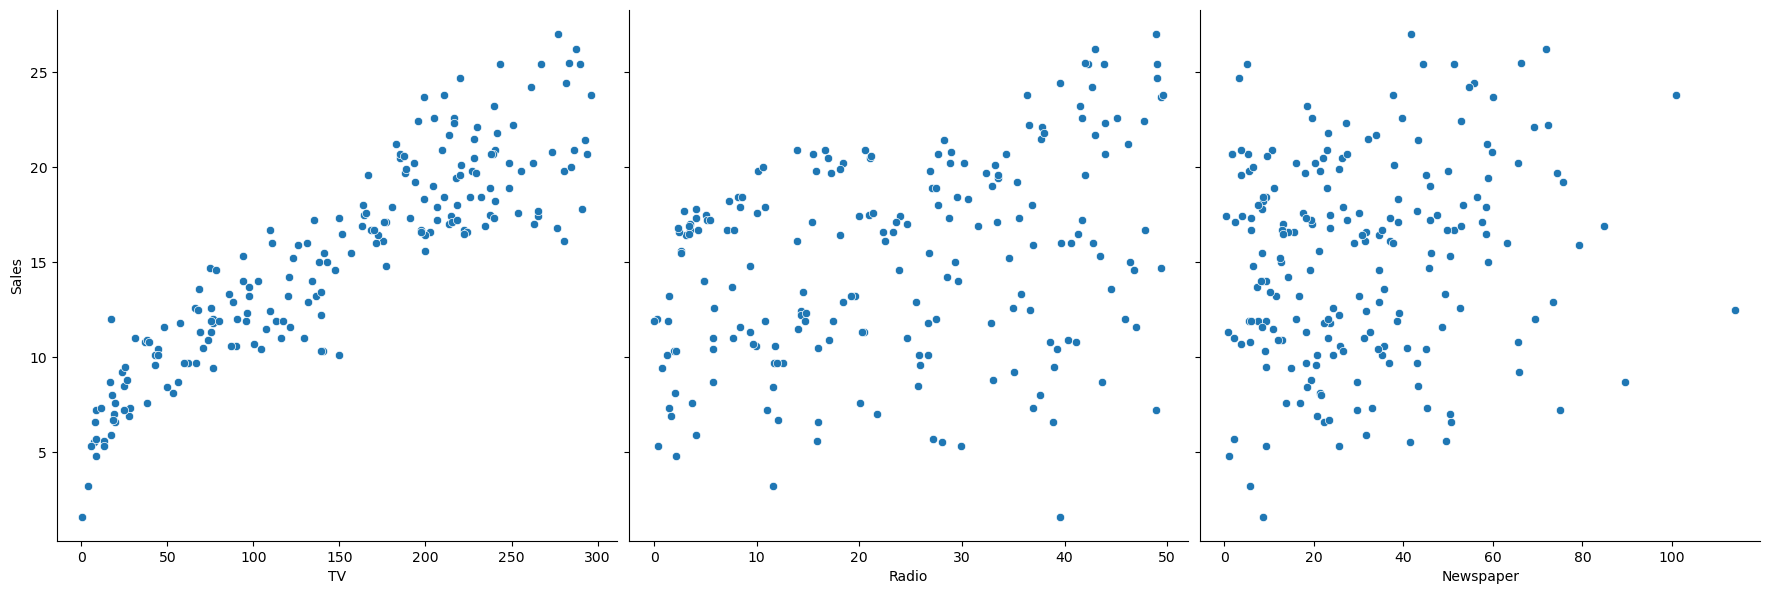

In [13]:
sns.pairplot(ad,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=6,aspect=1,kind='scatter')
plt.show()

<Axes: >

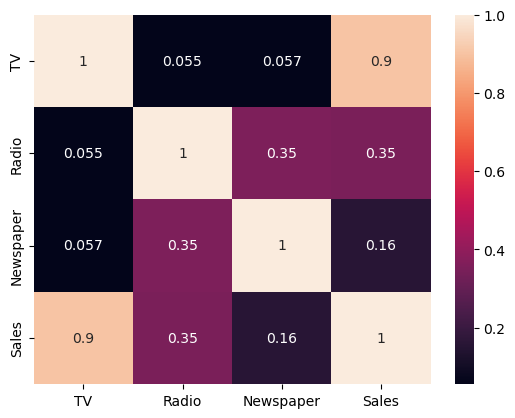

In [17]:
sns.heatmap(ad.corr(),annot=True)

In [18]:
x= ad['TV']
y=ad['Sales']


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [28]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [27]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [26]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [30]:
x_train.shape

(140,)

In [31]:
# adding additional column to the train and test data
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

x_train.shape
x_test.shape

(60, 1)

In [32]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

# fitting the model
lm.fit(x_train,y_train)


LinearRegression()

In [33]:
print('Intercept :',lm.intercept_)

print("Slope :",lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


In [34]:
#The straight-line equation we get for the above values is,
#Sales = 6.948 + 0.054 * TV

In [37]:
# making prediction and eveluateing
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)


In [41]:
# Comparing the r2 value of both train and test data
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662
